# Graph Diameter

In [49]:
%matplotlib inline

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [50]:
G=nx.read_edgelist('0.edges') # from https://snap.stanford.edu/data/egonets-Facebook.html

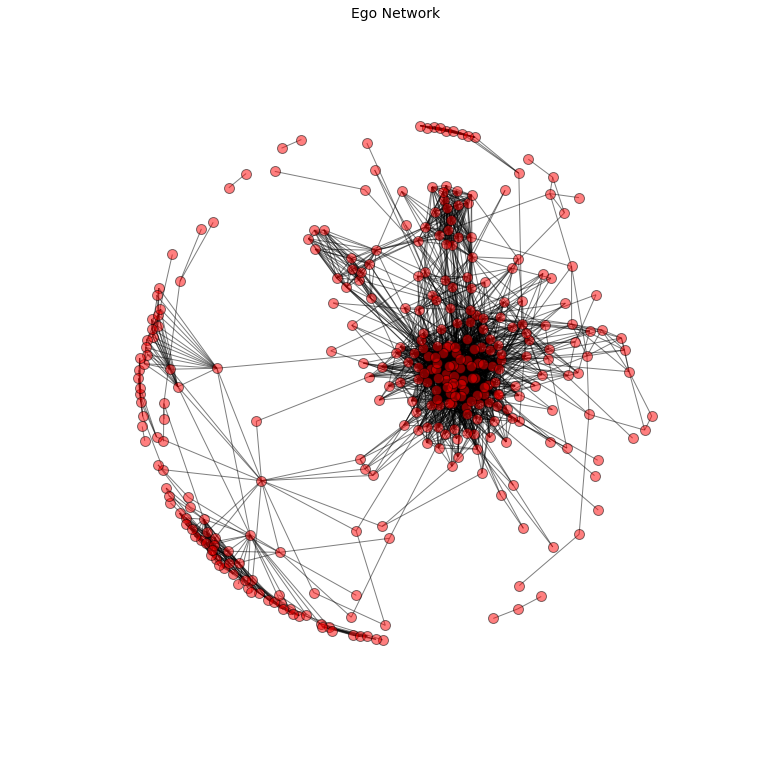

In [51]:
plt.figure(figsize=(10,10))
nx.draw_spring(G,node_size=100,alpha=.5)
plt.title('Ego Network',fontsize=14)
plt.show()

[[-1.07609689]]


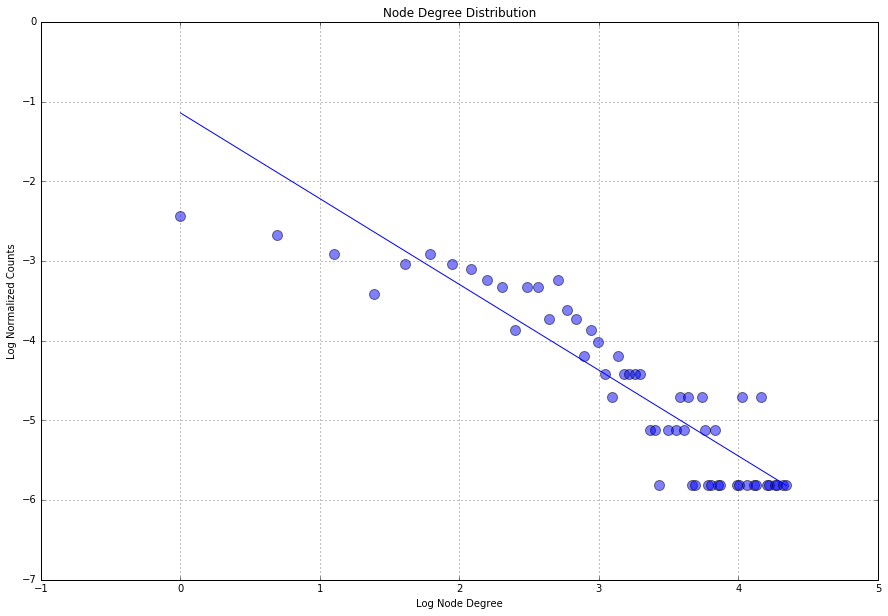

In [64]:
degree_count=G.degree().values()
#print degree_count
h=np.bincount(degree_count)
n=np.arange(0,len(h))
n=n[h!=0]
h=h[h!=0]
h=h/np.sum(h).astype(np.float)

logh=np.log(h)
logn=np.log(n)

model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression())
model_ransac.fit(logn.reshape(-1,1),logh.reshape(-1,1))
h_hat=model_ransac.predict(logn.reshape(-1,1))
print(model_ransac.estimator_.coef_)

plt.figure(figsize=(15,10))
plt.scatter(logn,logh,alpha=.5,s=100)
plt.plot(logn,h_hat)
plt.grid()
plt.ylabel(r'Log Normalized Counts')
plt.xlabel(r'Log Node Degree')
plt.title(r'Node Degree Distribution')
plt.show()